# Лабораторная работа №1 
Севрук Елизавета, гр.853504

In [135]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

# Метод середины квадрата


    Функция генерирует n чисел методом середины квадратов, с заданной разрядностью capacity.
    Возвращает сгенерированный массив, преобразованных к интервалу от 0 до 1.


In [136]:
def mid_square_method(start_number, n):
    z = []
    z.append(start_number)
    capacity = len(str(start_number))
    i=1
    
    while i < n:
        square = z[i - 1] ** 2
        square_len = len(str(square))
        str_next_z = str(square) if square_len == 2 * capacity else '0' * (2 * capacity - square_len) + str(square)
        #print(f'Step {i}: str_next_z = {str_next_z}')
        #z.append(int(str_next_z[int(k / 2):-int(k / 2)]))
        z.append(int(str_next_z[int(capacity/2):int((capacity/ 2) * 3)]))
        #print(f'z: {z}')
        i += 1
    del z[0]    
    return np.array(z) / 10 ** capacity
    

    Несмотря на видимую случайность чисел, генерируемых алгоритмом, ему свойственны недостатки. В самом деле, если в последовательности когда-нибудь появится число 0,0000, то все следующие за ним числа будут также равны 0,0000. Таким образом, многое зависит от начального выбора k и x_о.

In [137]:
#тестовый пример
print(mid_square_method(1994, 10))

[0.976  0.2576 0.6357 0.4114 0.9249 0.544  0.5936 0.236  0.5696]


# Мультипликативный конгруэнтный метод

    Функция генерирует n чисел мультипликативным конгруетным методом, с заданными входными параметрами m и k.
    Возвращает сгенерированный массив.
    Ai = (kAi -1) mod m
    zi =Ai /m,

In [138]:
def multiplicative_congruential_method(start_number, n, k=99999, m=2**20):
    A = []
    A.append(start_number)
    i = 1
    while i < n:
        A.append((k * A[i - 1]) % m) #получается чимло от 0 до m - 1
        i += 1
    del(A[0])    
    return np.array(A) / m

In [139]:
#тестовый пример
print(multiplicative_congruential_method(1994,5,  k =  66666666,  m =  33554432))

[0.72201645 0.76818776 0.90832567 0.20442677]


# Тестирование равномерности 

#### Функция для тестирования равномерности

In [140]:
def equability_testing(z, n, K):
    k = [i / K for i in range(K+1)] # K - кол-во отрезков
    p = []
    count = 0 
    for i in range(K):
        for j in z:
            if k[i] <= j < k[i + 1]: #если наше число массава z лежит в отрезке от k[i] до k[i + 1], то counter += 1 
                count += 1
        p.append(count / n)
        count = 0
    del k[-1]
    return p, k

#### Зададим начальные параметры

In [141]:
def amount_interval(n):
    if n <= 100:
        return int(math.sqrt(n))
    else:
        return 3 * int(math.log(n))

In [146]:
n = 100
k = 63036001
m = 2 ** 31 - 1
start_number = random.randint(10000000, 99999999)
K = amount_interval(n)
print('K = ', K)

z1 = mid_square_method(start_number, n)
z2 = mid_square_method(start_number, n**2)
print('start_number = ',start_number,' n = ', n,' k = ', k, ' m = ',m)
z3 = multiplicative_congruential_method(start_number, n, k, m)
z4 = multiplicative_congruential_method(start_number, n**2, k, m)

K =  10
start_number =  56490679  n =  100  k =  63036001  m =  2147483647


#### Построим гистограммы 

In [147]:
def hist_func(z1, z2, n):
    p1, k1 = equability_testing(z1, n, K)
    p2, k2 = equability_testing(z2, n**2, K)
    plt.plot(k1, p1, drawstyle='steps-pre', linewidth = 3, color = 'r')
    plt.plot(k2, p2, drawstyle='steps-pre', linewidth = 3, color = 'b')
    plt.plot(k1, [1 / len(k1) for i in range(len(k1))], linestyle='--', color='g')
    #plt.title(label=f'Тестирвание равномерности датчика \nполученного методом середины квадрата', fontsize=15)
    plt.show()

#### Тестирвание равномерности датчика полученного методом середины квадрата

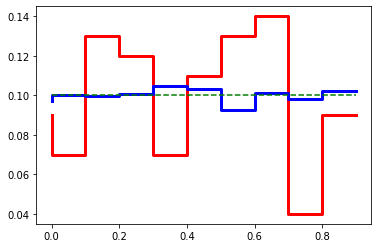

In [148]:
hist_func(z1, z2, n)

#### Тестирвание равномерности датчика полученного мультипликативным конгруэтным методом

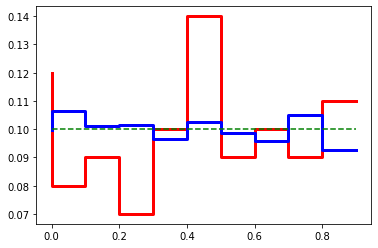

In [151]:
hist_func(z3, z4, n)

Выше была протестирована равномерность двух датчиков БСВ. Для каждого из них была постороена гистограмма для n и n ** 2 значений. Графики наглядно подтвердили, что частоты попадания в определенный интервал из K интервалов сходятся к значению 1 / K при увеличении n.

Проверив сходимость мат. ожидания и дисперсии к эталонным значениям, видим аналогичные закономерности:

In [186]:
def find_M_D(z, n):
    
    M = np.sum(z) / n
    D = 0
    for i in range(n-1):
        D += z[i] ** 2 - M ** 2
    D /= n
    
    return M, D

In [187]:
M1, D1 = find_M_D(z1, n)
M2, D2 = find_M_D(z2, n ** 2)
print('Для датчика полученного методом середины квадрата')
print(f'n = {n}\nM = {M1}, D = {D1}')
print(f'n = {n ** 2}\nM = {M2}, D = {D2}')

Для датчика полученного методом середины квадрата
n = 100
M = 0.487074264, D = 0.08045422414272521
n = 10000
M = 0.500038090115, D = 0.08277183726186536


In [188]:
M3, D3 = find_M_D(z3, n)
M4, D4 = find_M_D(z4, n ** 2)
print('Для датчика полученного мультипликативным конгруэтным методом')
print(f'n = {n}\nM = {M3}, D = {D3}')
print(f'n = {n ** 2}\nM = {M4}, D = {D4}')

Для датчика полученного мультипликативным конгруэтным методом
n = 100
M = 0.4983334690697182, D = 0.08857488538632437
n = 10000
M = 0.4952224470466479, D = 0.08286547075092088


##### Вывод: чем больше значчение n, тем ближе мат.ожидание и дисперсия к эталонным значениям

## Тестирование независимости 


#### Функци для определения корреляции между подпоследовательностями

In [203]:
def correl(z, s, n):
    x, y = z[ :n-s], z[s: ]
    
    M_x, D_x = find_M_D(x, n - s)
    M_y, D_y = find_M_D(y, n - s)
    M_xy = 0
    for i in range(n - s):
        M_xy += x[i] * y[i]
    M_xy /= (n - s)
    
    R = M_xy - (M_x * M_y)
    R /= ((D_x * D_y) ** 0.5)
    
    return R

#### Зададим s 

In [195]:
s = 20

In [205]:
c1 = correl(z1, s, n-1)
c2 = correl(z2, s, n ** 2-1)
print('Для датчика полученного методом середины квадрата')
print(f'n = {n}\nR = {c1}')
print(f'n = {n ** 2}\nR = {c2}')

Для датчика полученного методом середины квадрата
n = 100
R = 0.09120657464548287
n = 10000
R = -0.004254911527623838


In [206]:
c3 = correl(z3, s, n-1)
c4 = correl(z4, s, n ** 2-1)
print('Для датчика полученного мультипликативным конгруэтным методом')
print(f'n = {n}\nR = {c3}')
print(f'n = {n ** 2}\nR = {c4}')

Для датчика полученного мультипликативным конгруэтным методом
n = 100
R = -0.257017917321069
n = 10000
R = 0.008134280444524938


Таким образом можем видеть, что смоделированные датчики удовлетворяют требованию независимости, т.к. при увеличении n оценка коэффициента корреляции стремится к нулю.